# VISUALIZANDO GEOMETRICAMENTE COMO FUNCIONAN LOS ALGORITMOS

Ya hemos comentado en varias ocasiones la relación entre la parte algebraica y la parte geométrica del funcionamiento de los algoritmos.

En este módulo bonus vamos a visualizarla. Creo que te resultará muy revelador y te ayudará a entender mejor cómo funciona cada algoritmo.

Dado que como mejor se perciben los patrones es en 2D vamos a trabajar sólo con las 2 variables que el random forest nos había mostrado más predictivas: x3 y x6.

Vamos a reprentar todos los modelos de clasicación que hemos aprendido.

Y para hacer esa representación gráfica vamos a usar un paquete llamado mlxtend, que puedes instalar así:

conda install mlxtend --channel conda-forge

Cargamos los paquetes necesarios

In [8]:
from mlxtend.plotting import plot_decision_regions
import matplotlib.pyplot as plt
import pandas as pd

Cargamos el dataset sintetico_binaria.csv y nos quedamos solo con las 2 mejores predictoras y la target

In [9]:
df = pd.read_csv('../00_DATASETS/sintetico_binaria.csv')

df = df[['x3','x6','target']]

df

,x3,x6,target
0,-0.349640,1.495543,0
1,-0.016071,0.618956,1
2,-0.448371,-0.914221,1
3,1.285303,-0.574685,0
4,2.335109,3.615928,1
...,...,...,...
995,0.506537,0.275886,0
996,2.731870,2.681244,0
997,1.067600,-1.067705,0
998,3.307268,2.814642,0


Dado que el objetivo no es la capacidad predictiva, si no la visualización, y por simplicidad no vamos a dividir entre train y test, si no que entrenaremos sobre el total de datos disponibles. Ni tampoco vamos a optimizar hiperparámetros.

Pero mlxtend solo funciona con arrays de Numpy, así que lo que sí tenemos que hacer es convertir a este formato cuando generamos los x,y

In [10]:
x = df.drop(columns = 'target').values
y = df['target'].values

## REGRESIÓN LOGÍSTICA

In [4]:
from sklearn.linear_model import LogisticRegression

#Instanciar
rl = LogisticRegression()

#Entrenar
rl.fit(x,y)

LogisticRegression()

Visualizamos

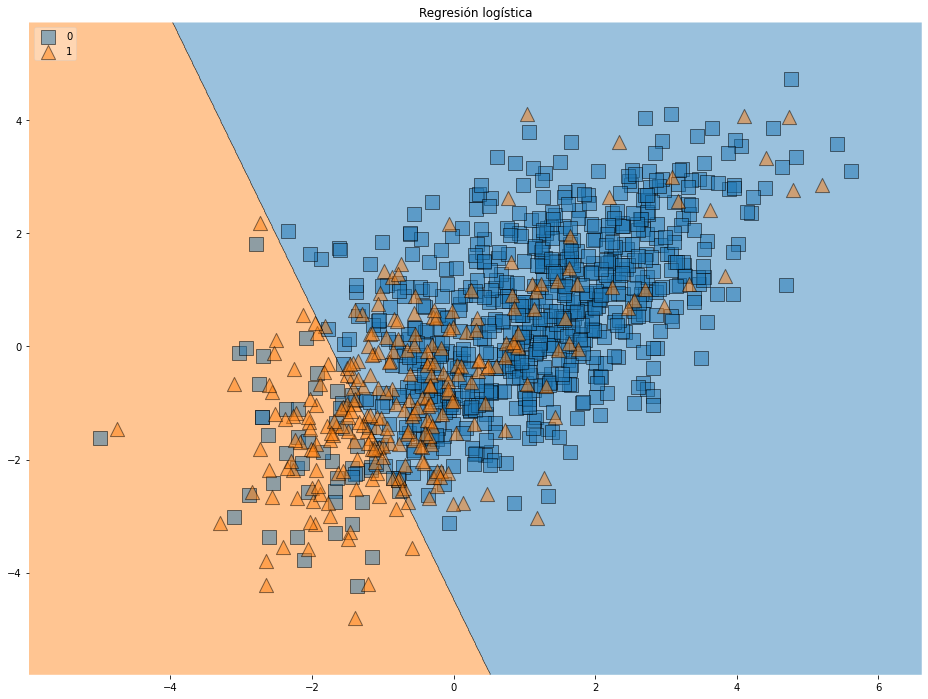

In [11]:
#Tamaño del gráfico
plt.figure(figsize = (16,12))
#Podemos pasarle las opciones a través del parámetro scatter_kwargs como un diccionario
scatter_kwargs = {'s': 200, 'alpha': 0.5}
#Gráfico
plot_decision_regions(x, y, clf=rl, legend=2,scatter_kwargs=scatter_kwargs)
plt.title('Regresión logística');

## KNN

In [12]:
from sklearn.neighbors import KNeighborsClassifier

#Instanciar
kc = KNeighborsClassifier()

#Entrenar
kc.fit(x, y)

KNeighborsClassifier()

Visualizamos

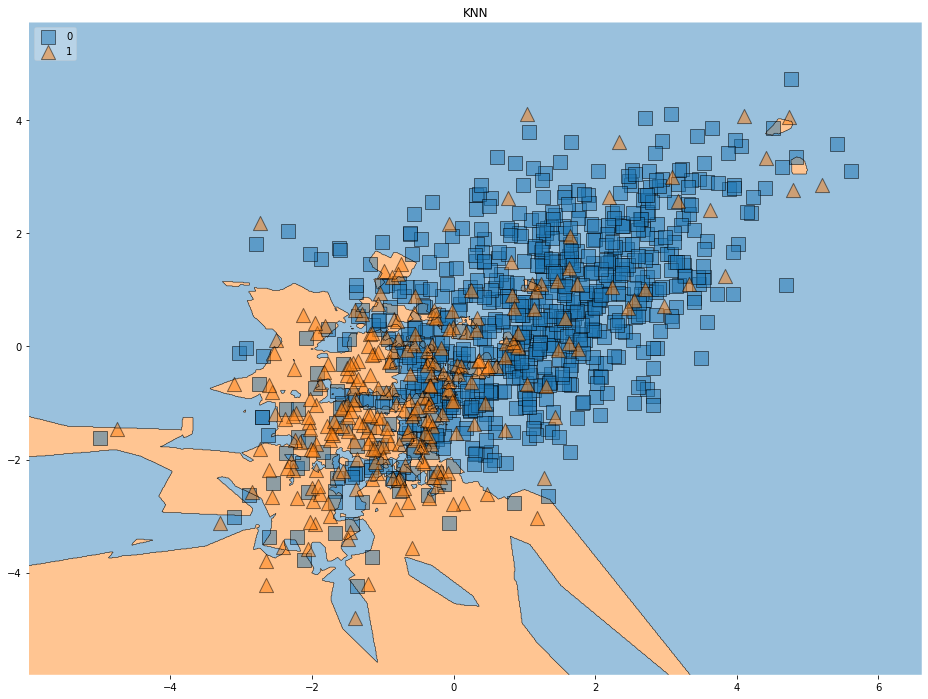

In [13]:
#Tamaño del gráfico
plt.figure(figsize = (16,12))
#Podemos pasarle las opciones a través del parámetro scatter_kwargs como un diccionario
scatter_kwargs = {'s': 200, 'alpha': 0.5}
#Gráfico
plot_decision_regions(x, y, clf=kc, legend=2,scatter_kwargs=scatter_kwargs)
plt.title('KNN');

## NAIVE BAYES

In [14]:
from sklearn.naive_bayes import GaussianNB

#Instanciar
nb = GaussianNB()

#Entrenar
nb.fit(x,y)

GaussianNB()

Visualizamos

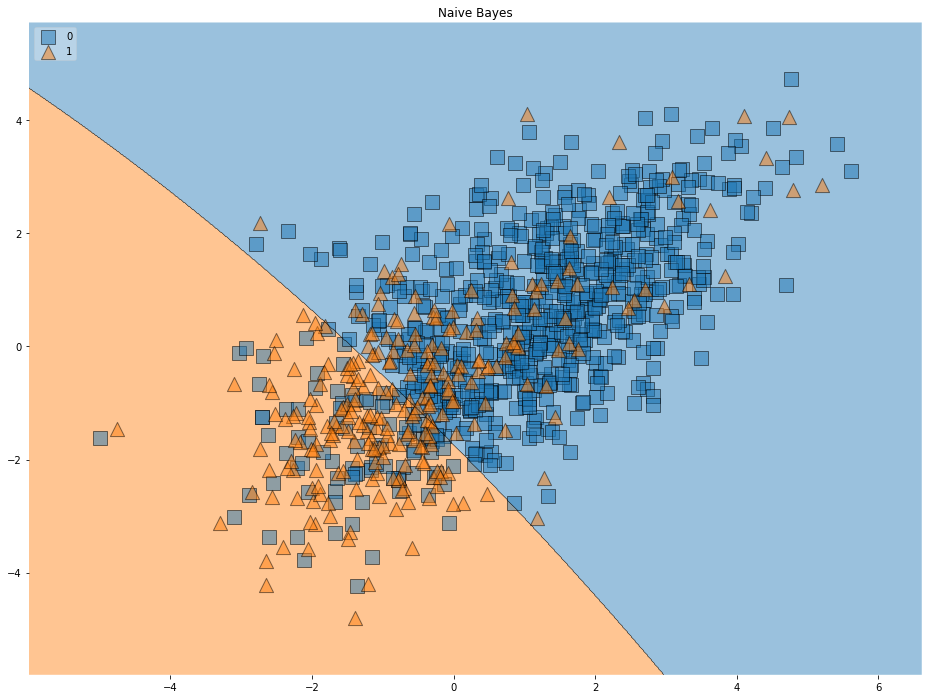

In [15]:
#Tamaño del gráfico
plt.figure(figsize = (16,12))
#Podemos pasarle las opciones a través del parámetro scatter_kwargs como un diccionario
scatter_kwargs = {'s': 200, 'alpha': 0.5}
#Gráfico
plot_decision_regions(x, y, clf=nb, legend=2,scatter_kwargs=scatter_kwargs)
plt.title('Naive Bayes');

Link a la respuesta de si Naive Bayes es o no lineal: https://stats.stackexchange.com/questions/142215/how-is-naive-bayes-a-linear-classifier

## ÁRBOLES DE CLASIFICACIÓN

In [16]:
from sklearn.tree import DecisionTreeClassifier

#Instanciar
ac = DecisionTreeClassifier()

#Entrenar
ac.fit(x,y)

DecisionTreeClassifier()

Visualizamos

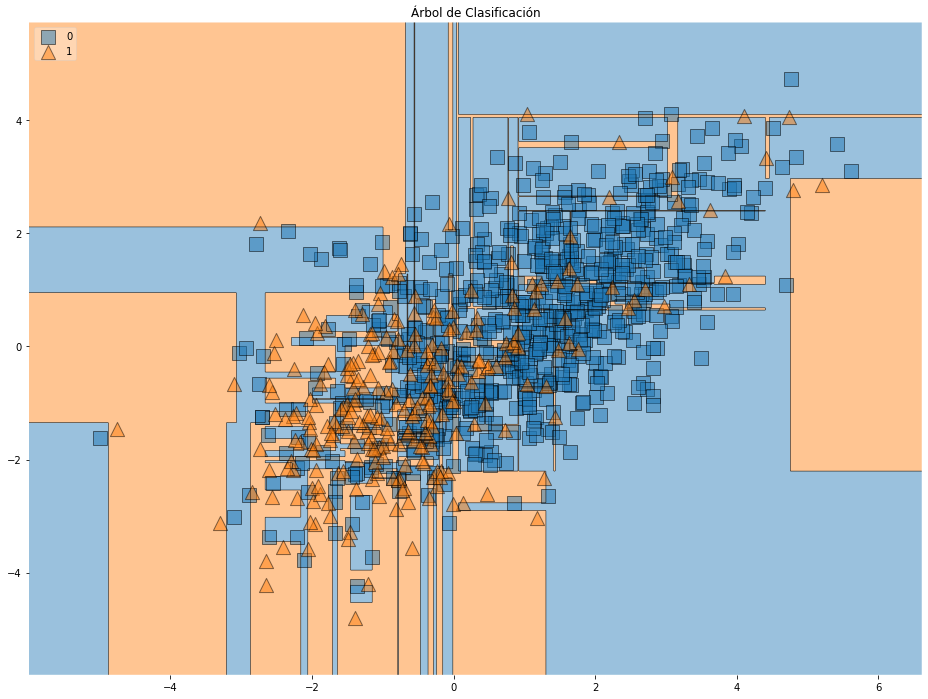

In [17]:
#Tamaño del gráfico
plt.figure(figsize = (16,12))
#Podemos pasarle las opciones a través del parámetro scatter_kwargs como un diccionario
scatter_kwargs = {'s': 200, 'alpha': 0.5}
#Gráfico
plot_decision_regions(x, y, clf=ac, legend=2,scatter_kwargs=scatter_kwargs)
plt.title('Árbol de Clasificación');

## RANDOM FOREST

In [18]:
from sklearn.ensemble import RandomForestClassifier

#Instanciar
rf = RandomForestClassifier()

#Entrenar
rf.fit(x,y)

RandomForestClassifier()

Visualizamos

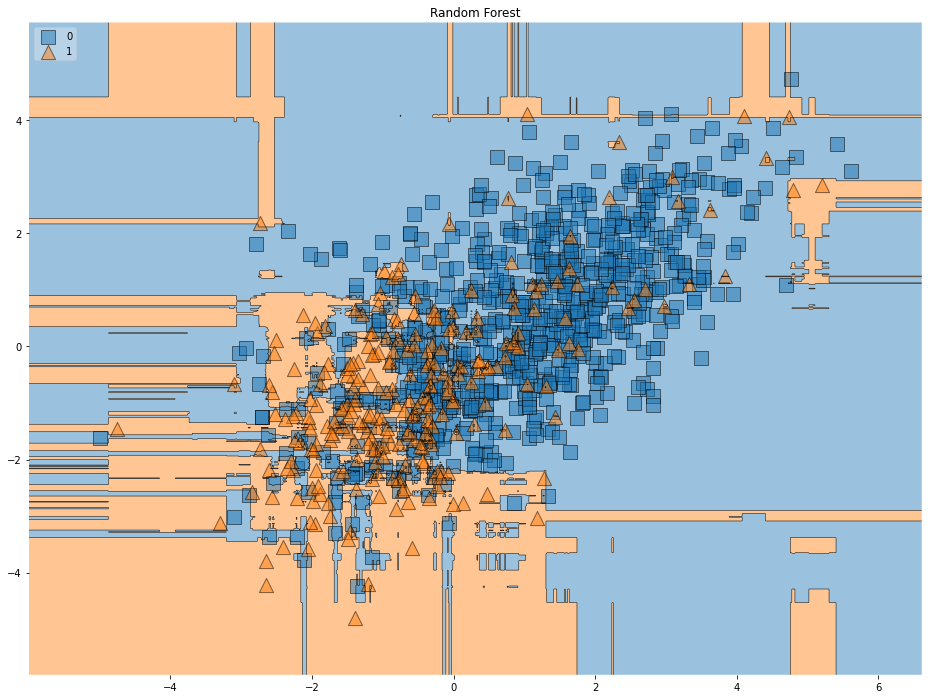

In [19]:
#Tamaño del gráfico
plt.figure(figsize = (16,12))
#Podemos pasarle las opciones a través del parámetro scatter_kwargs como un diccionario
scatter_kwargs = {'s': 200, 'alpha': 0.5}
#Gráfico
plot_decision_regions(x, y, clf=rf, legend=2,scatter_kwargs=scatter_kwargs)
plt.title('Random Forest');

## XGBOOST

In [20]:
from xgboost import XGBClassifier

#Instanciar
xgb = XGBClassifier(use_label_encoder=False)#lo del encoder es para que no de warning

#Entrenar
xgb.fit(x,y,
        early_stopping_rounds = 5,
        eval_set=[(x, y)],
        eval_metric = 'auc')

[0]	validation_0-auc:0.84086
[1]	validation_0-auc:0.85152
[2]	validation_0-auc:0.86115
[3]	validation_0-auc:0.86792
[4]	validation_0-auc:0.88376
[5]	validation_0-auc:0.89449
[6]	validation_0-auc:0.90201
[7]	validation_0-auc:0.91061
[8]	validation_0-auc:0.91545
[9]	validation_0-auc:0.91940
[10]	validation_0-auc:0.92216
[11]	validation_0-auc:0.92570
[12]	validation_0-auc:0.93051
[13]	validation_0-auc:0.93394
[14]	validation_0-auc:0.93733
[15]	validation_0-auc:0.93903
[16]	validation_0-auc:0.94166
[17]	validation_0-auc:0.94560
[18]	validation_0-auc:0.94774
[19]	validation_0-auc:0.94981
[20]	validation_0-auc:0.95440
[21]	validation_0-auc:0.95546
[22]	validation_0-auc:0.95612
[23]	validation_0-auc:0.95787
[24]	validation_0-auc:0.95922
[25]	validation_0-auc:0.96099
[26]	validation_0-auc:0.96133
[27]	validation_0-auc:0.96327
[28]	validation_0-auc:0.96498
[29]	validation_0-auc:0.96693
[30]	validation_0-auc:0.96814
[31]	validation_0-auc:0.96993
[32]	validation_0-auc:0.97134
[33]	validation_0-au

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=12, num_parallel_tree=1, random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', use_label_encoder=False,
              validate_parameters=1, verbosity=None)

Visualizamos

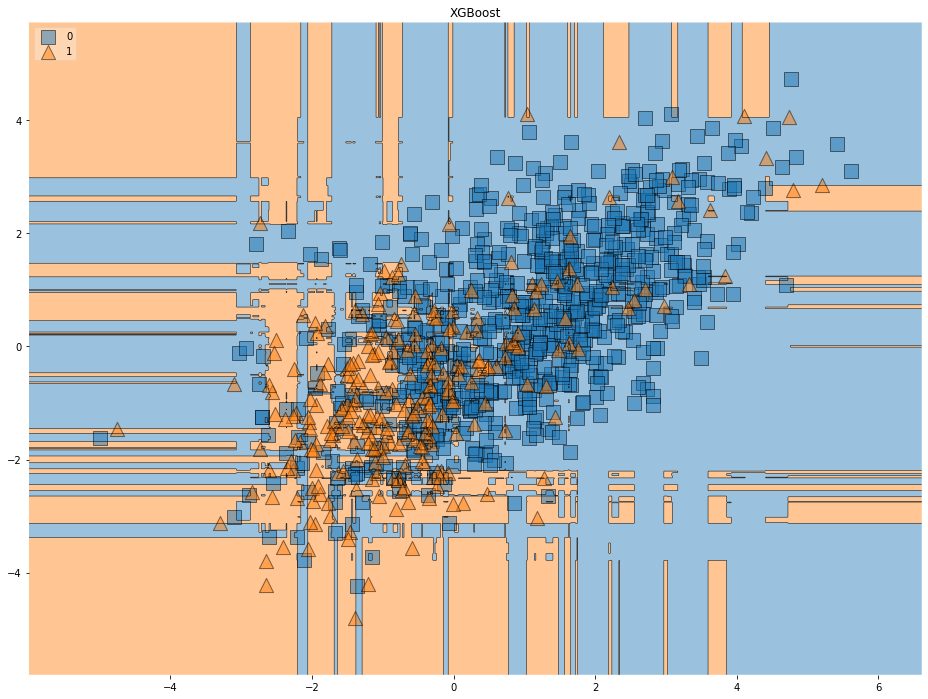

In [21]:
#Tamaño del gráfico
plt.figure(figsize = (16,12))
#Podemos pasarle las opciones a través del parámetro scatter_kwargs como un diccionario
scatter_kwargs = {'s': 200, 'alpha': 0.5}
#Gráfico
plot_decision_regions(x, y, clf=xgb, legend=2,scatter_kwargs=scatter_kwargs)
plt.title('XGBoost');

## LIGHT GBM

In [22]:
#Permitir el uso de funciones experimentales
from sklearn.experimental import enable_hist_gradient_boosting

#Importar
from sklearn.ensemble import HistGradientBoostingClassifier

#Instanciar
hgb = HistGradientBoostingClassifier()

#Entrenar
hgb.fit(x,y)

HistGradientBoostingClassifier()

Visualizamos

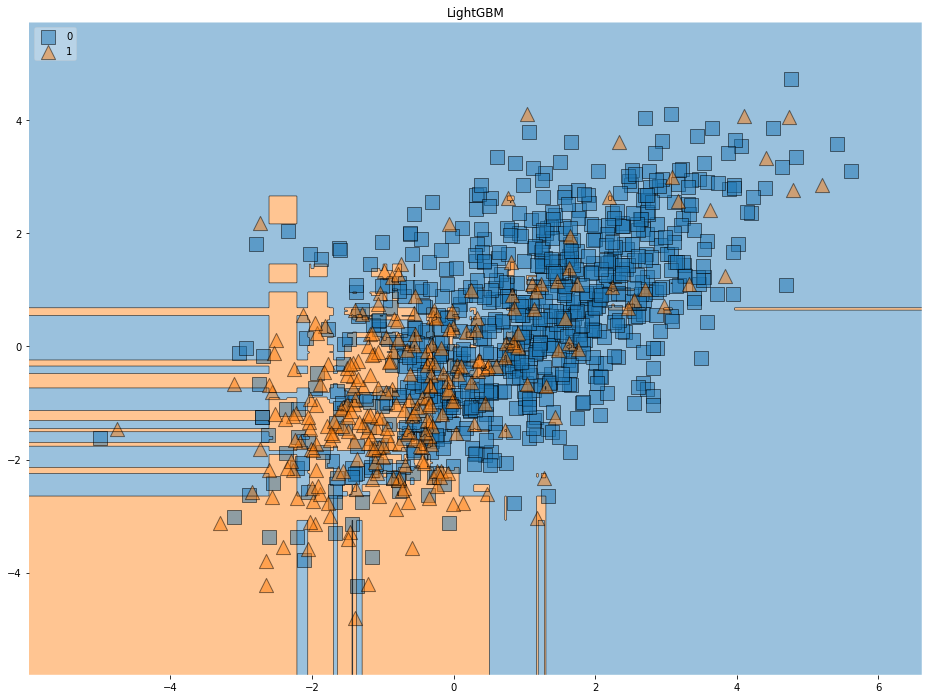

In [23]:
#Tamaño del gráfico
plt.figure(figsize = (16,12))
#Podemos pasarle las opciones a través del parámetro scatter_kwargs como un diccionario
scatter_kwargs = {'s': 200, 'alpha': 0.5}
#Gráfico
plot_decision_regions(x, y, clf=hgb, legend=2,scatter_kwargs=scatter_kwargs)
plt.title('LightGBM');